In [1]:
import main

In [1]:
import classification as cls

Обучение модели
Best_params Random Forest Classifier (classification by annotation)
{'criterion': 'entropy', 'max_depth': 90, 'max_features': 80, 'n_estimators': 90}
Report
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      1299
        True       0.96      0.84      0.90      1095

    accuracy                           0.91      2394
   macro avg       0.92      0.91      0.91      2394
weighted avg       0.91      0.91      0.91      2394

Random Forest for (classification by annotation) 507.0 min 49.321569204330444 sec


c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1350 fits failed out of a total of 4950.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
495 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be g

Обучение модели
Best_params Random Forest Classifier (classification by name)
{'criterion': 'gini', 'max_depth': 60, 'max_features': 80, 'n_estimators': 40}
Report
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1299
        True       0.91      0.75      0.82      1095

    accuracy                           0.85      2394
   macro avg       0.86      0.84      0.85      2394
weighted avg       0.86      0.85      0.85      2394

Random Forest for (classification by name) 46.0 min 38.856423139572144 sec


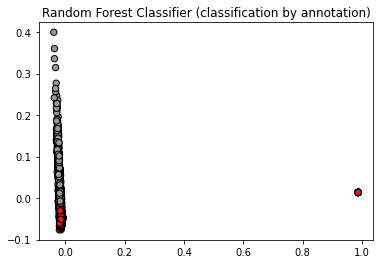

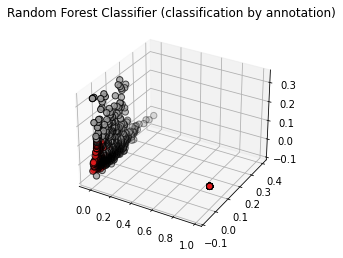

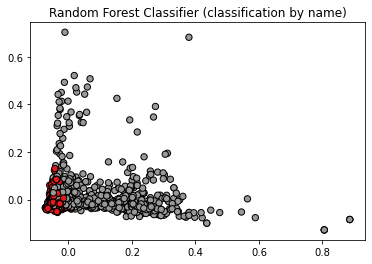

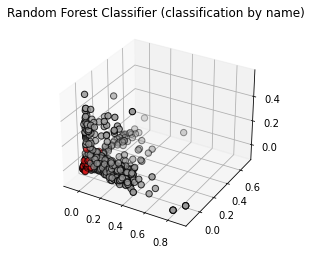

In [5]:
# Классификация random forest с удалением малозначимых терминов// с графиками

file = open("Классификация random forest с удалением малозначимых терминов NAME_param.txt", 'w', encoding='utf-8')

file_predict = open("Метки random forest NAME_param.txt", 'w', encoding='utf-8')

test_pred, classificationReport, confusionMatrix, accuracy = cls.random_forest(main.x_train_N, main.x_test_N, main.y_train_N, main.y_test_N, "(classification by name)",
{'criterion': ['gini'], 'max_depth': list(range(0, 101, 10)), 'max_features': list(range(0, 81, 10)), 'n_estimators': list(range(0, 91, 10))})
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()


In [3]:
import receiving_n_transforming_data as rtd
import dimensionality_reduction as drf
import classification as cls

import time

# start_time = time.time()


data = rtd.read_data_xlsx("data.xlsx")
name_tf_idf, annotation_tf_idf, labels = rtd.choce_from_data(data=data, tf_idf=True)     # Получение tf-idf матрицы для названий и аннотаций


# Получение матриц сокращенной размерности и терминов к матрицам ищ файлов
name_tf_idf_short, terms_by_name_short = drf.read_dimData_fromFiles(tf_idf_file="name_tf_idf_short.txt", terms_file="terms_by_name_short.txt")
annotation_tf_idf_short, terms_by_annatation_short = drf.read_dimData_fromFiles(tf_idf_file="annotation_tf_idf_short.txt", terms_file="terms_by_annatation_short.txt")

# Распределение данных на тренировочные и тестовые, сохранение их в файл
from sklearn.model_selection import train_test_split

x_train_N, x_test_N, y_train_N, y_test_N = train_test_split(name_tf_idf_short, labels, train_size=0.3, random_state=0)
x_train_A, x_test_A, y_train_A, y_test_A = train_test_split(annotation_tf_idf_short, labels, train_size=0.3, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
import time

c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1350 fits failed out of a total of 4950.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
495 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be g

Обучение модели
Best_params Random Forest Classifier (classification by name)
{'criterion': 'gini', 'max_depth': 70, 'max_features': 40, 'n_estimators': 40}
Report
              precision    recall  f1-score   support

       False       0.82      0.95      0.88      1299
        True       0.92      0.75      0.83      1095

    accuracy                           0.86      2394
   macro avg       0.87      0.85      0.85      2394
weighted avg       0.86      0.86      0.85      2394

Random Forest for (classification by name) 17.0 min 57.438013792037964 sec


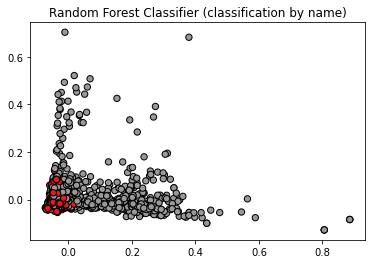

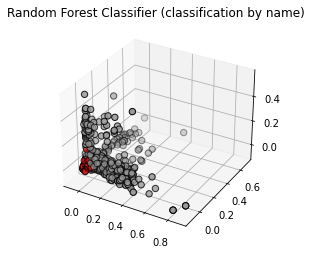

In [9]:
# Классификация random forest с удалением малозначимых терминов// с графиками

file = open("Классификация random forest с удалением малозначимых терминов NAME_param_1.txt", 'w', encoding='utf-8')

file_predict = open("Метки random forest NAME_param_1.txt", 'w', encoding='utf-8')

test_pred, classificationReport, confusionMatrix, accuracy = cls.random_forest(main.x_train_N, main.x_test_N, main.y_train_N, main.y_test_N, "(classification by name)",
{'criterion': ['gini'], 'max_depth': list(range(0, 101, 10)), 'max_features': list(range(0, 81, 10)), 'n_estimators': list(range(0, 91, 10))})
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()


In [4]:
file = open("Классификация random forest с удалением малозначимых терминов ANNOTATION_1.txt", 'w', encoding='utf-8')

file_predict = open("Метки random forest ANNOTATION_1.txt", 'w', encoding='utf-8')

test_pred, classificationReport, confusionMatrix, accuracy = cls.random_forest(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()

KeyboardInterrupt: 